Classification tree
Use the titanic.csv dataset included in the assignment.

Step 1: read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 80% samples for training and the rest 20% for test

In [169]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import GridSearchCV, KFold

In [160]:
df = pd.read_csv("Titanic.csv", usecols= ['pclass', 'survived', 'sex', 'age', 'sibsp'])

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   object 
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 51.3+ KB


In [162]:
df['survived'] = df['survived'].map({1: 'yes', 0: 'no'})
df = df.dropna(subset=['age'])
df.head()

pclass survived     sex      age  sibsp
0    1st      yes  female  29.0000      0
1    1st      yes    male   0.9167      1
2    1st       no  female   2.0000      1
3    1st       no    male  30.0000      1
4    1st       no  female  25.0000      1

In [163]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [164]:
train_df, test_df = split_train_test(df, 0.20)

In [165]:
train_X = train_df[['pclass', 'sex', 'age', 'sibsp']]
train_y = train_df['survived']

test_X = test_df[['pclass', 'sex', 'age', 'sibsp']]
test_y = test_df['survived']

label_encoder = LabelEncoder()
for column in ['pclass', 'sex']:
    train_X[column] = label_encoder.fit_transform(train_X[column])
    test_X[column] = label_encoder.fit_transform(test_X[column])

<ipython-input-165-74091a4eb9e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X[column] = label_encoder.fit_transform(train_X[column])
<ipython-input-165-74091a4eb9e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[column] = label_encoder.fit_transform(test_X[column])
<ipython-input-165-74091a4eb9e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Step 2: fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

In [166]:
tree = DecisionTreeClassifier(random_state = 4)
tree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=4)

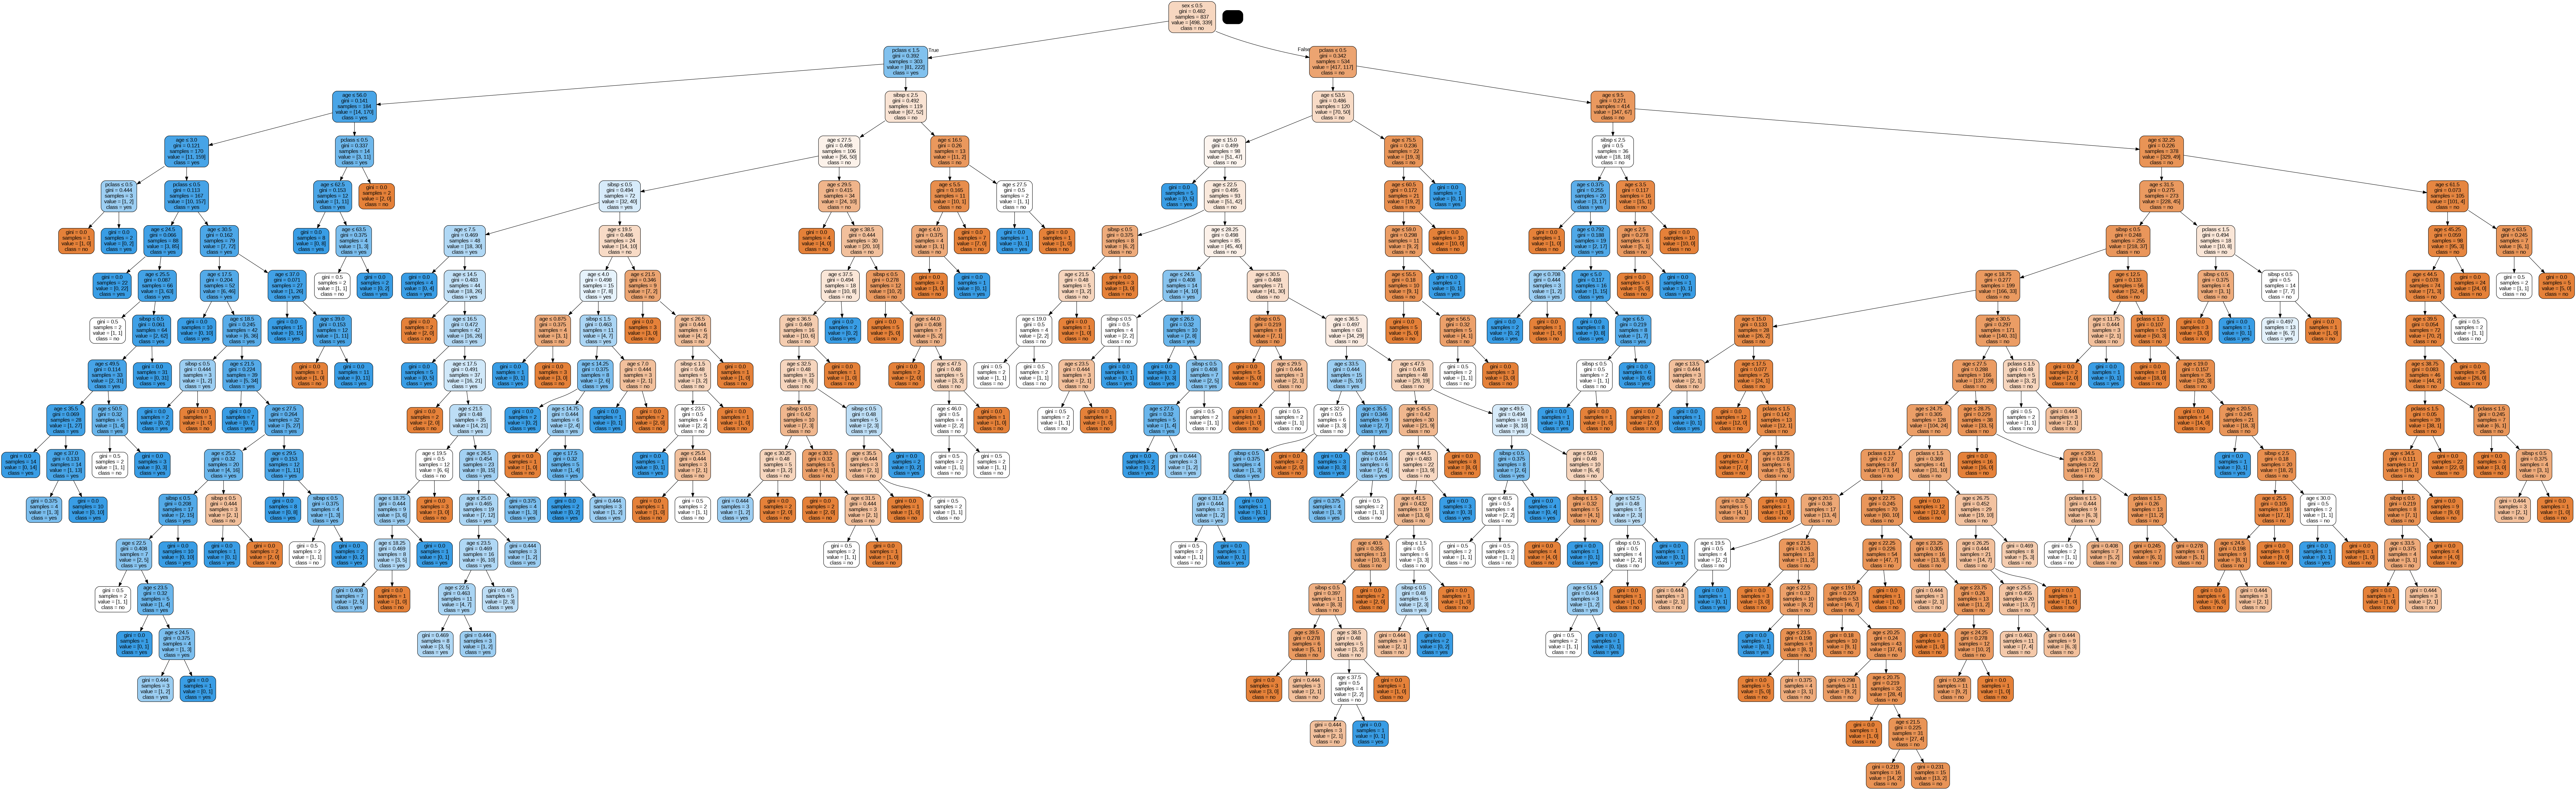

In [167]:
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=train_X.columns,
                           class_names=['no', 'yes'],
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Step 3: print out the performance measures of the full model: in-sample and out-of-sample accuracy, defined as following:

in-sample percent survivors correctly predicted (on training set)

in-sample percent fatalities correctly predicted (on training set)

out-of-sample percent survivors correctly predicted (on test set)

out-of-sample percent fatalities correctly predicted (on test set)

In [168]:
from sklearn.metrics import accuracy_score

y_train_pred = tree.predict(train_X)
in_sample_survivors_acc = accuracy_score(train_y[train_y =='yes'], y_train_pred[train_y =='yes'])
in_sample_fatalities_acc = accuracy_score(train_y[train_y =='no'], y_train_pred[train_y =='no'])

y_test_pred = tree.predict(test_X)
out_sample_survivors_acc = accuracy_score(test_y[test_y =='yes'], y_test_pred[test_y =='yes'])
out_sample_fatalities_acc = accuracy_score(test_y[test_y =='no'], y_test_pred[test_y =='no'])

print('in_sample_survivors_acc', in_sample_survivors_acc)
print('in_sample_fatalities_acc', in_sample_fatalities_acc)

print('out_sample_survivors_acc', out_sample_survivors_acc)
print('out_sample_fatalities_acc', out_sample_fatalities_acc)

in_sample_survivors_acc 0.8259587020648967
in_sample_fatalities_acc 0.9558232931726908
out_sample_survivors_acc 0.7159090909090909
out_sample_fatalities_acc 0.7851239669421488


Step 4: use cross-validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. Find the minimum number of misclassification and choose the corresponding tree size to prune
the tree.

In [180]:
param_grid = {'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]}

kfold = KFold(n_splits=5, shuffle=True, random_state=4)
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 4), param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(train_X, train_y)

tree_sizes = param_grid['max_leaf_nodes']
misclassifications = -grid_search.cv_results_['mean_test_score']

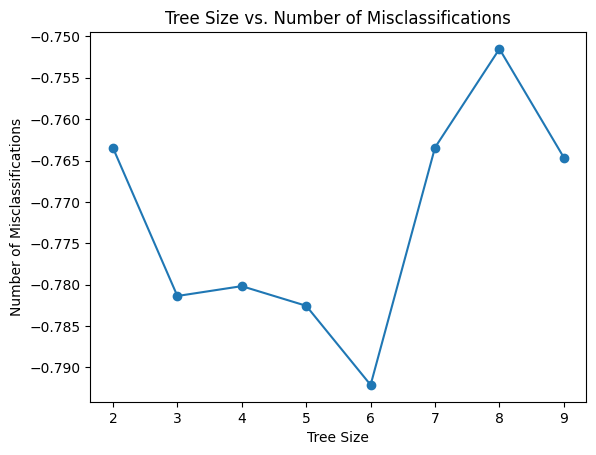

Minimum number of misclassifications -0.792108639863131
Best tree size 6


In [184]:
plt.plot(tree_sizes, misclassifications, marker='o')
plt.xlabel('Tree Size')
plt.ylabel('Number of Misclassifications')
plt.title('Tree Size vs. Number of Misclassifications')
plt.show()

min_misclassification = np.min(misclassifications)
best_tree_size = tree_sizes[np.argmin(misclassifications)]

print("Minimum number of misclassifications", min_misclassification)
print("Best tree size", best_tree_size)

Step 5: prune the tree with the optimal tree size. Plot the pruned tree.

In [185]:
tree_pruned = DecisionTreeClassifier(max_depth = best_tree_size, random_state = 4)
tree_pruned.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=6, random_state=4)

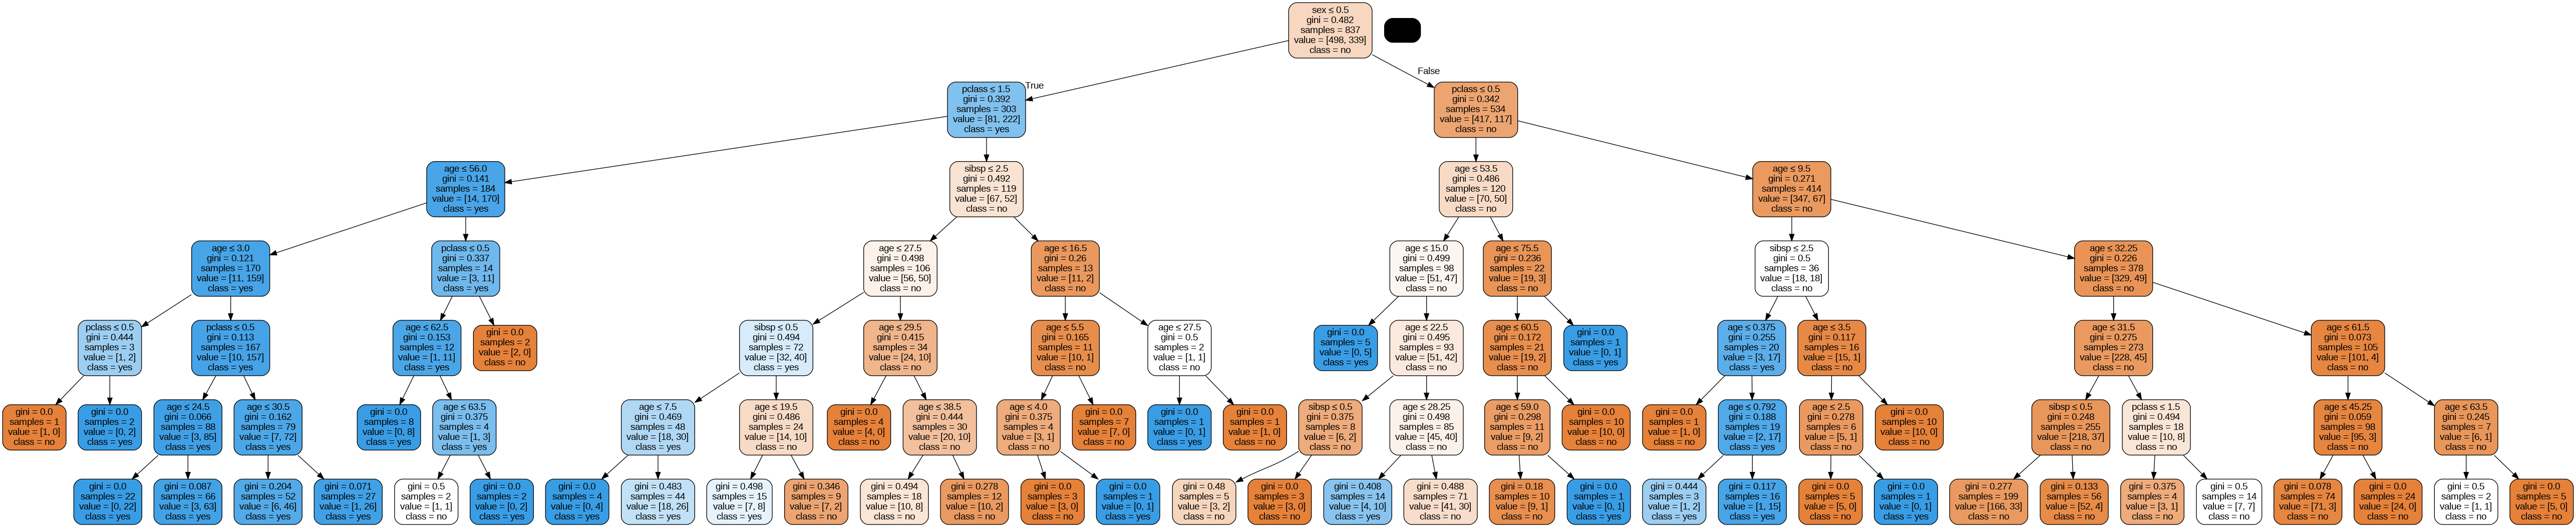

In [186]:
dot_data = export_graphviz(tree_pruned, out_file=None,
                           feature_names=train_X.columns,
                           class_names=['no', 'yes'],
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Step 6: For the final pruned tree, report its in-sample and out-of-sample accuracy, defined as in-sample percent survivors correctly predicted (on training set) in-sample percent fatalities correctly predicted (on training set)
out-of-sample percent survivors correctly predicted (on test set)
out-of-sample percent fatalities correctly predicted (on test set)
Check whether there is improvement in out-of-sample for the full tree (bigger model) and the pruned tree (smaller model)

In [188]:
y_train_pred = tree_pruned.predict(train_X)
in_sample_survivors_acc_pruned = accuracy_score(train_y[train_y =='yes'], y_train_pred[train_y =='yes'])
in_sample_fatalities_acc_pruned = accuracy_score(train_y[train_y =='no'], y_train_pred[train_y =='no'])

y_test_pred = tree_pruned.predict(test_X)
out_sample_survivors_acc_pruned = accuracy_score(test_y[test_y =='yes'], y_test_pred[test_y =='yes'])
out_sample_fatalities_acc_pruned = accuracy_score(test_y[test_y =='no'], y_test_pred[test_y =='no'])

print('in_sample_survivors_acc_pruned', in_sample_survivors_acc_pruned)
print('in_sample_fatalities_acc_pruned', in_sample_fatalities_acc_pruned)

print('out_sample_survivors_acc_pruned', out_sample_survivors_acc_pruned)
print('out_sample_fatalities_acc_pruned', out_sample_fatalities_acc_pruned)

in_sample_survivors_acc_pruned 0.7197640117994101
in_sample_fatalities_acc_pruned 0.9176706827309237
out_sample_survivors_acc_pruned 0.75
out_sample_fatalities_acc_pruned 0.8677685950413223


In [189]:
print('out_sample_survivors_acc', out_sample_survivors_acc)
print('out_sample_fatalities_acc', out_sample_fatalities_acc)

out_sample_survivors_acc 0.7159090909090909
out_sample_fatalities_acc 0.7851239669421488


Out of sample accuracy has clearly improved after pruning the tree.